In [1]:
%pylab notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from math import *
import time
import pandas as pd
from datetime import datetime
import csv
from scipy import integrate
import itertools




Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  This is separate from the ipykernel package so we can avoid doing imports until


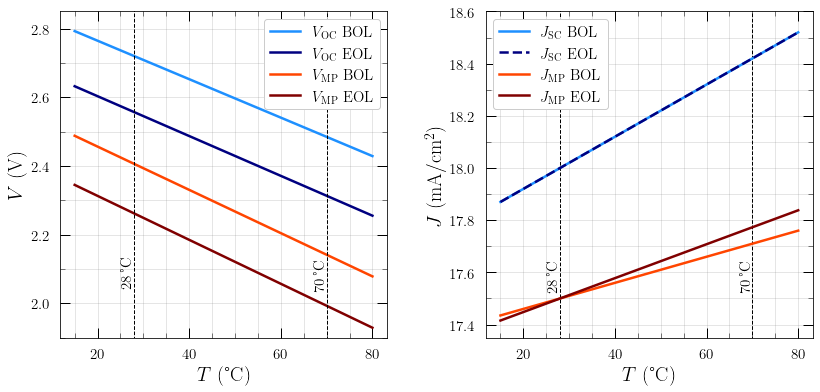

In [177]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,siunitx}"]

##############################Initialise#####################################################
nrow = 1
ncol = 2
xsize = 13.5
ysize = 6

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

numpad = 10

#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew/2 #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 15 #axis label font size
numsize = 15 #axis number font size
legfont = 15 #legend font size
labelfont=20

#############################################################################################


temp = linspace(15,80,1000)

VOCBOL = 2.72
VOCEOL = 0.94*VOCBOL
JSCBOL = 18
JSCEOL = JSCBOL
VMPBOL = 2.406
VMPEOL = 0.94*VMPBOL
JMPBOL = 17.5
JMPEOL = JMPBOL

delta_VOCBOL = -0.0056
delta_VOCEOL = -0.0058
delta_JSCBOL = 0.010
delta_JSCEOL = 0.010
delta_VMPBOL = -0.0063
delta_VMPEOL = -0.0064
delta_JMPBOL = 0.005
delta_JMPEOL = 0.0065

ref = 28

VOCBOL_rng = VOCBOL + delta_VOCBOL*(temp-ref)
VOCEOL_rng = VOCEOL + delta_VOCEOL*(temp-ref)
JSCBOL_rng = JSCBOL + delta_JSCBOL*(temp-ref)
JSCEOL_rng = JSCEOL + delta_JSCEOL*(temp-ref)
VMPBOL_rng = VMPBOL + delta_VMPBOL*(temp-ref)
VMPEOL_rng = VMPEOL + delta_VMPEOL*(temp-ref)
JMPBOL_rng = JMPBOL + delta_JMPBOL*(temp-ref)
JMPEOL_rng = JMPEOL + delta_JMPEOL*(temp-ref)

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(xsize,ysize))

plots = axes[0].plot(temp, VOCBOL_rng , color = 'dodgerblue', label = r'$V_{\text{OC}}$ BOL', lw = 2.5)
plots = axes[0].plot(temp, VOCEOL_rng , color = 'navy', label = r'$V_{\text{OC}}$ EOL', lw = 2.5)
plots = axes[0].plot(temp, VMPBOL_rng , color = 'orangered', label = r'$V_{\text{MP}}$ BOL', lw = 2.5)
plots = axes[0].plot(temp, VMPEOL_rng , color = 'maroon', label = r'$V_{\text{MP}}$ EOL', lw = 2.5)

plots = axes[0].plot([28,28], [0,10] , '--',color = 'black', label='_nolegend_', lw = 1)
plots = axes[0].plot([70,70], [0,10] , '--',color = 'black', label='_nolegend_', lw = 1)
plots = axes[1].plot([28,28], [0,100] , '--',color = 'black', label='_nolegend_', lw = 1)
plots = axes[1].plot([70,70], [0,100] , '--',color = 'black', label='_nolegend_', lw = 1)

plots = axes[1].plot(temp, JSCBOL_rng , color = 'dodgerblue', label = r'$J_{\text{SC}}$ BOL', lw = 2.5)
plots = axes[1].plot(temp, JSCEOL_rng , '--',color = 'navy', label = r'$J_{\text{SC}}$ EOL', lw = 2.5)
plots = axes[1].plot(temp, JMPBOL_rng , color = 'orangered', label = r'$J_{\text{MP}}$ BOL', lw = 2.5)
plots = axes[1].plot(temp, JMPEOL_rng , color = 'maroon', label = r'$J_{\text{MP}}$ EOL', lw = 2.5)

for i in range(0,2):
    axes[i].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].xaxis.set_minor_locator(MultipleLocator(5))
    axes[i].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[i].grid(color='gray', which='both', linestyle='-', linewidth=1,alpha=0.2)
    
axes[0].set_ylabel(r'$V$ (V)', fontsize = labelfont)
axes[0].set_xlabel(r'$T$ ($\SI{}{\degree C}$)', fontsize = labelfont)
axes[1].set_ylabel(r'$J$ ($\SI{}{mA/cm ^2}$)', fontsize = labelfont)
axes[1].set_xlabel(r'$T$ ($\SI{}{\degree C}$)', fontsize = labelfont)
    
axes[0].set_ylim(1.9,2.85)
axes[1].set_ylim(17.35,18.6)

fig.subplots_adjust(hspace=0.025, wspace=0.3)

#axes.set_ylabel(r'$P$ (W)', fontsize = labelfont)
#axes.set_xticks(x)
#axes.set_xticklabels(labels)
leg = axes[0].legend(fontsize = legfont,loc='upper right',framealpha = 1)
leg = axes[1].legend(fontsize = legfont,loc='upper left',framealpha = 1)

axes[0].text(25, 2.05, r'$\SI{28}{\degree C}$', fontsize=15, rotation='vertical')
axes[0].text(67.2, 2.04, r'$\SI{70}{\degree C}$', fontsize=15, rotation='vertical')
axes[1].text(25, 17.53, r'$\SI{28}{\degree C}$', fontsize=15, rotation='vertical')
axes[1].text(67.2, 17.53, r'$\SI{70}{\degree C}$', fontsize=15, rotation='vertical')


fig.savefig('XTJPrimeTempDep1.png', dpi=400)



C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  This is separate from the ipykernel package so we can avoid doing imports until


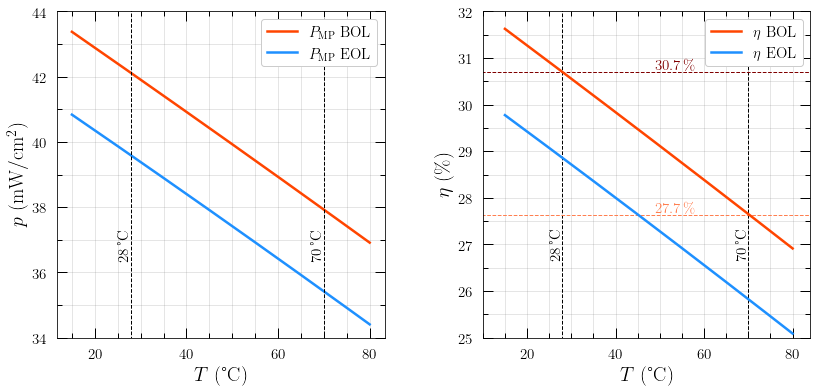

In [178]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,siunitx}"]

##############################Initialise#####################################################
nrow = 1
ncol = 2
xsize = 13.5
ysize = 6

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

numpad = 10

#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 15 #axis label font size
numsize = 15 #axis number font size
legfont = 15 #legend font size
labelfont=20

#############################################################################################


temp = linspace(15,80,1000)

VOCBOL = 2.72
VOCEOL = 0.94*VOCBOL
JSCBOL = 18
JSCEOL = JSCBOL
VMPBOL = 2.406
VMPEOL = 0.94*VMPBOL
JMPBOL = 17.5
JMPEOL = JMPBOL

delta_VOCBOL = -0.0056
delta_VOCEOL = -0.0058
delta_JSCBOL = 0.010
delta_JSCEOL = 0.010
delta_VMPBOL = -0.0063
delta_VMPEOL = -0.0064
delta_JMPBOL = 0.005
delta_JMPEOL = 0.0065

refEff = 30.7
refEffEOL = refEff*0.94

ref = 28

VOCBOL_rng = VOCBOL + delta_VOCBOL*(temp-ref)
VOCEOL_rng = VOCEOL + delta_VOCEOL*(temp-ref)
JSCBOL_rng = JSCBOL + delta_JSCBOL*(temp-ref)
JSCEOL_rng = JSCEOL + delta_JSCEOL*(temp-ref)
VMPBOL_rng = VMPBOL + delta_VMPBOL*(temp-ref)
VMPEOL_rng = VMPEOL + delta_VMPEOL*(temp-ref)
JMPBOL_rng = JMPBOL + delta_JMPBOL*(temp-ref)
JMPEOL_rng = JMPEOL + delta_JMPEOL*(temp-ref)

effBOL = refEff*(VMPBOL_rng*JMPBOL_rng/VMPBOL/JMPBOL)
effEOL = refEffEOL*(VMPEOL_rng*JMPEOL_rng/(VMPEOL*JMPEOL))


fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(xsize,ysize))

plots = axes[0].plot(temp, VMPBOL_rng*JMPBOL_rng , color = 'orangered', label = r'$P_{\text{MP}}$ BOL', lw = 2.5)
plots = axes[0].plot(temp, VMPEOL_rng*JMPEOL_rng , color = 'dodgerblue', label = r'$P_{\text{MP}}$ EOL', lw = 2.5)

plots = axes[0].plot([28,28], [0,100] , '--',color = 'black', label='_nolegend_', lw = 1)
plots = axes[0].plot([70,70], [0,100] , '--',color = 'black', label='_nolegend_', lw = 1)
plots = axes[1].plot([28,28], [0,100] , '--',color = 'black', label='_nolegend_', lw = 1)
plots = axes[1].plot([70,70], [0,100] , '--',color = 'black', label='_nolegend_', lw = 1)

plots = axes[1].plot([0,100], [30.7,30.7] , '--',color = 'maroon', label='_nolegend_', lw = 1)
plots = axes[1].plot([0,100], [27.64,27.64] , '--',color = 'coral', label='_nolegend_', lw = 1)

plots = axes[1].plot(temp, effBOL , color = 'orangered', label = r'$\eta$ BOL', lw = 2.5)
plots = axes[1].plot(temp, effEOL ,  color = 'dodgerblue', label = r'$\eta$ EOL', lw = 2.5)

for i in range(0,len(axes)):
    axes[i].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].xaxis.set_minor_locator(MultipleLocator(5))
    axes[0].yaxis.set_minor_locator(MultipleLocator(1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.5))
    axes[i].grid(color='gray', which='both', linestyle='-', linewidth=1,alpha=0.2)
    
    
axes[0].set_ylabel(r'$p$ ($\SI{}{mW/cm^2}$)', fontsize = labelfont)
axes[0].set_xlabel(r'$T$ ($\SI{}{\degree C}$)', fontsize = labelfont)
axes[1].set_ylabel(r'$\eta$ ($\SI{}{\%}$)', fontsize = labelfont)
axes[1].set_xlabel(r'$T$ ($\SI{}{\degree C}$)', fontsize = labelfont)
    
fig.subplots_adjust(hspace=0.025, wspace=0.3)

axes[0].set_ylim(34,44)
axes[1].set_ylim(25,32)
axes[1].set_xlim(10,84)

#axes.set_ylabel(r'$P$ (W)', fontsize = labelfont)
#axes.set_xticks(x)
#axes.set_xticklabels(labels)
leg = axes[0].legend(fontsize = legfont,loc='upper right',framealpha = 1)
leg = axes[1].legend(fontsize = legfont,loc='upper right',framealpha = 1)

axes[0].text(25, 36.4, r'$\SI{28}{\degree C}$', fontsize=15, rotation='vertical')
axes[0].text(67.2, 36.4, r'$\SI{70}{\degree C}$', fontsize=15, rotation='vertical')
axes[1].text(25, 26.7, r'$\SI{28}{\degree C}$', fontsize=15, rotation='vertical',color='black')
axes[1].text(67.2, 26.7, r'$\SI{70}{\degree C}$', fontsize=15, rotation='vertical',color='black')
axes[1].text(49, 30.77, r'$\SI{30.7}{\%}$', fontsize=15, rotation='horizontal',color='maroon')
axes[1].text(49, 27.7, r'$\SI{27.7}{\%}$', fontsize=15, rotation='horizontal',color='coral')

fig.savefig('XTJPrimeTempDep2.png', dpi=400)

In [190]:
((VMPBOL_rng*JMPBOL_rng)[200]-(VMPBOL_rng*JMPBOL_rng)[845])/(VMPBOL_rng*JMPBOL_rng)[200]

0.09921945960143012